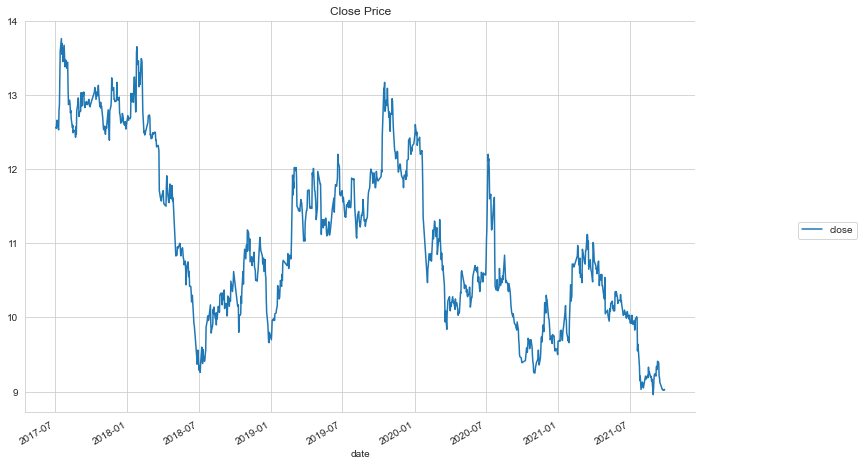

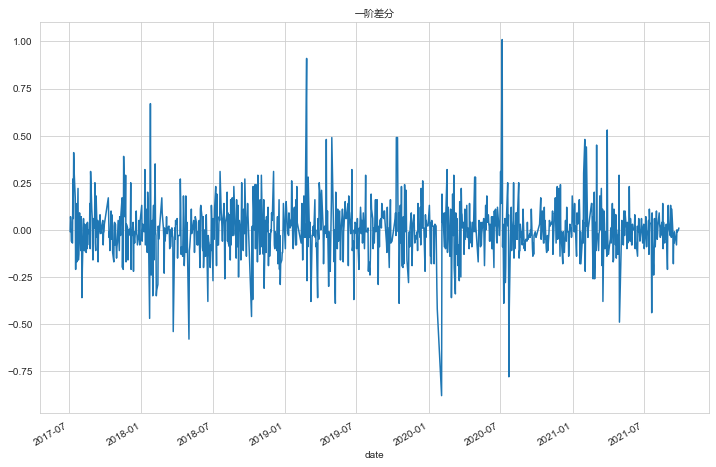

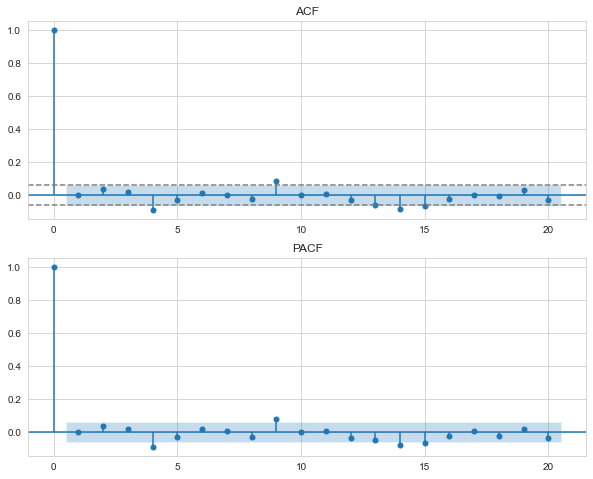

No handles with labels found to put in legend.


                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 1034
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 517.599
Method:                       css-mle   S.D. of innovations              0.147
Date:                Fri, 01 Oct 2021   AIC                          -1023.197
Time:                        13:39:14   BIC                           -993.550
Sample:                             1   HQIC                         -1011.947
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0034      0.005     -0.736      0.462      -0.013       0.006
ar.L1.D.close    -0.2375      0.095     -2.490      0.013      -0.424      -0.051
ar.L2.D.close    -0.8211      0.087     

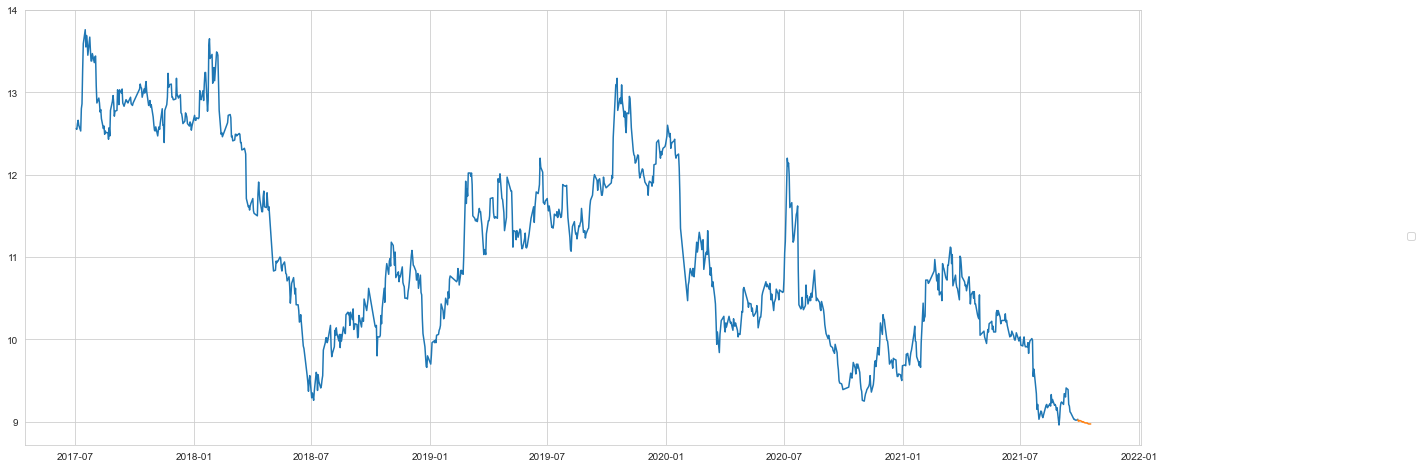

In [6]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings("ignore")

myfont = fm.FontProperties(fname='C:/Windows/Fonts/msyh.ttc')

%matplotlib inline
#600000 浦发银行
stock = pd.read_csv('D600000.csv', index_col=0, parse_dates=[0])
stock.tail(10)
stock = stock['close']
stock_train =stock['2017':'2021']

sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
stock_train.plot()
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title('Close Price')
sns.despine()

stock_diff = stock_train.diff()
stock_diff = stock_diff.dropna()
 
plt.figure(figsize=(12,8))
 
stock_diff.plot()
plt.title(u'一阶差分',fontproperties=myfont)
plt.show()

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(stock_diff, lags=20, ax=ax1)
plt.axhline(y=-1.96/np.sqrt(len(stock_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(stock_diff)),linestyle='--',color='gray')
plt.title('ACF')
 
ax2 = fig.add_subplot(212)
fig =  plot_pacf(stock_diff, lags=20, ax=ax2)
plt.title('PACF')
 
plt.show()

stock_train = stock_train.dropna()
model = ARIMA(stock_train, order=(2,1,2))
model_fit = model.fit(disp=0,maxiter=100)
print(model_fit.summary())
print('之后20天预测')
pred = model_fit.forecast(15)
print(pred)
pred = pd.Series(pred[0],index=pd.period_range('20210928','20211017',freq = 'B'))
print (pred)
plt.figure(figsize=(20,8))
plt.plot(stock_train)
plt.plot(pred)
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.show()


